In [1]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
# loading the audio file 

space_file = "audios/another-planet-sound.wav"
ipd.Audio(space_file)

In [4]:
# loading audio file into array 

space_sound, sr = librosa.load(space_file)
space_sound

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        4.4752514e-07, -3.1281169e-07,  0.0000000e+00], dtype=float32)

In [5]:
space_sound.shape

(562540,)

In [7]:
space_sound_fft = np.fft.fft(space_sound)

In [8]:
space_sound_fft

array([-230.35064062+7.28306304e-14j,  -37.51096605+5.08493214e+01j,
         70.69293462-4.02549824e+01j, ...,  -12.8707157 -1.17835313e+00j,
         70.69293462+4.02549824e+01j,  -37.51096605-5.08493214e+01j])

In [9]:
space_sound_fft.shape

(562540,)

In [11]:
space_sound_fft[0]

(-230.35064062003704+7.283063041541027e-14j)

In [12]:
magnitude_spec_space_sound = np.abs(space_sound_fft)
magnitude_spec_space_sound

array([230.35064062,  63.1880215 ,  81.35081202, ...,  12.92454404,
        81.35081202,  63.1880215 ])

In [13]:
magnitude_spec_space_sound[0]

230.35064062003704

In [15]:
def plot_magnitude_spectrum(signal, title, sr, fr_ratio=1):
    ft = np.fft.fft(signal)
    magn_spec = np.abs(ft)
    # plotting magnitude specturm
    plt.figure(figsize=(18,5))
    frequency_bins = np.linspace(0, sr, len(magn_spec))  
    """ 
    for solving mirrored central symmetry problem 
    """ 
    req_num_freq_bins = int(len(frequency_bins) * fr_ratio)
    plt.plot(frequency_bins[:req_num_freq_bins], magn_spec[:req_num_freq_bins])
    plt.xlabel("Frequecny [Hz]")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.show()
    

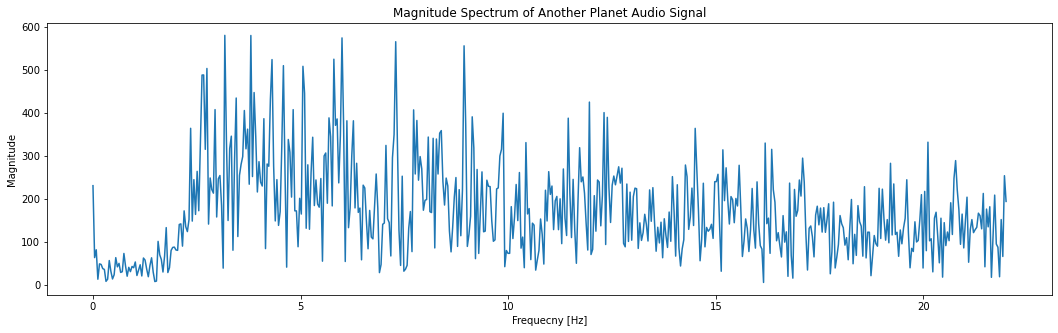

In [31]:
plot_magnitude_spectrum(space_sound, "Magnitude Spectrum of Another Planet Audio Signal",sr,0.001)

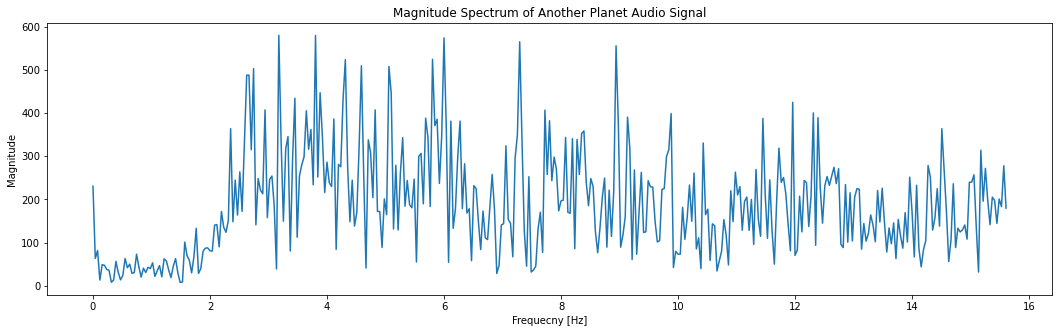

In [45]:
plot_magnitude_spectrum(space_sound, "Magnitude Spectrum of Another Planet Audio Signal",sr,0.00071)

In [33]:
# Now extracting STFT

FRAME_SIZE = 2048
HOP_SIZE = 512

sound_stFt = librosa.stft(space_sound, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
sound_stFt

array([[ 4.4625082e+00+0.0000000e+00j,  6.5056968e+00+0.0000000e+00j,
         1.1079837e+01+0.0000000e+00j, ...,
        -8.7853537e+00+0.0000000e+00j, -9.9471750e+00+0.0000000e+00j,
        -1.1001060e+01+0.0000000e+00j],
       [ 5.9103161e-01-9.1506663e-17j, -3.7987409e+00+1.6425836e+00j,
        -6.6298962e+00+2.9093909e+00j, ...,
         4.9470463e+00+4.7456689e+00j,  3.8285222e+00-5.8029270e+00j,
         8.0196829e+00+4.6338372e+00j],
       [-4.7846694e+00-8.8496427e-17j,  5.0473218e+00+1.1736931e+00j,
        -1.1257001e+00-8.5562239e+00j, ...,
        -2.6646575e-02-8.9936314e+00j,  2.4064398e+00+8.5205669e+00j,
        -3.8465340e+00-8.0006571e+00j],
       ...,
       [ 4.5432230e-06+7.1149193e-17j, -6.9791936e-06-1.3633645e-05j,
        -1.5400859e-06+1.6519265e-05j, ...,
         4.0290297e-06-1.7169693e-06j, -3.4515363e-06+3.0867641e-06j,
         4.7895019e-06-2.6943937e-06j],
       [-3.7437969e-06-1.1600963e-16j,  1.4173859e-05+8.0263435e-06j,
         4.5675743e-06

In [34]:
sound_stFt.shape

(1025, 1099)

In [36]:
type(sound_stFt[0][0])

numpy.complex64

In [37]:
Y_scale = np.abs(sound_stFt) ** 2

In [39]:
print(Y_scale.shape,"\n")
print(type(Y_scale[0][0]))

(1025, 1099) 

<class 'numpy.float32'>


In [40]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f") 

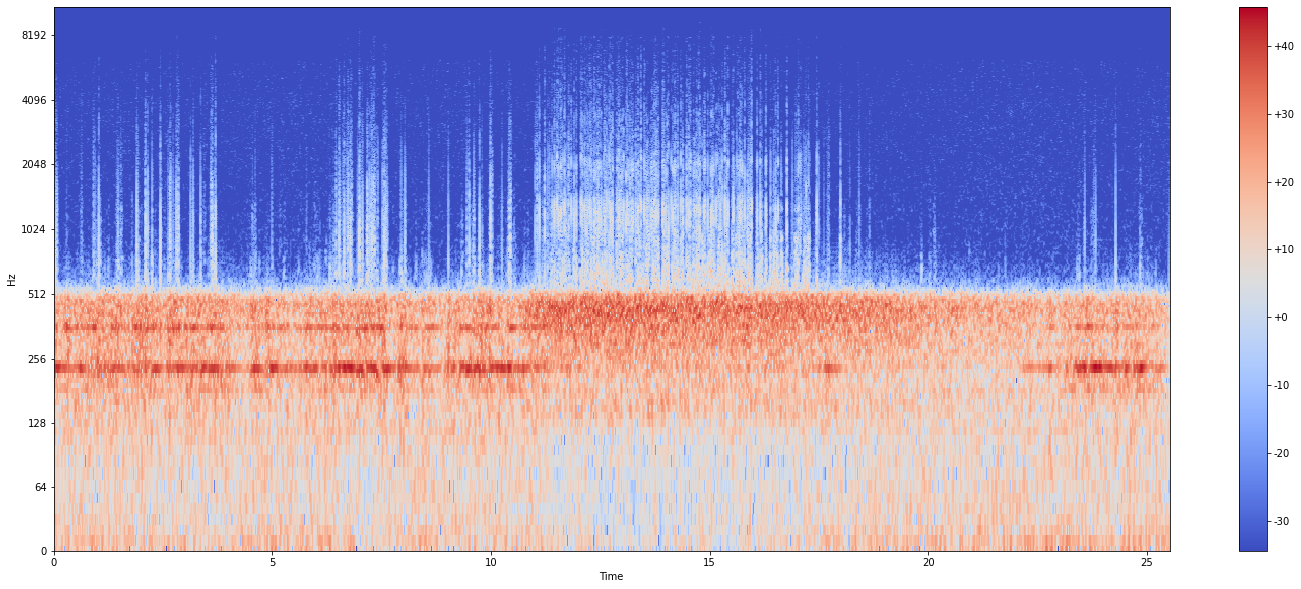

In [43]:
Y_scale_log= librosa.power_to_db(Y_scale)
plot_spectrogram(Y_scale_log, sr, hop_length=HOP_SIZE,y_axis="log")